In [3]:
import pandas as pd
import os
# from pathlib import Path
# import sys, traceback
# import subprocess
# import json

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.ticker import StrMethodFormatter
# import re
# import Bio.PDB

<span style="Times New Roman; font-size:2em;">**Loading data**</span>

In [2]:
merged_df = pd.read_csv('merged.csv')
merged_df['RESIDUE NUMBER'] = merged_df['RESIDUE NUMBER'].astype('string')
merged_df['RESIDUE TYPE'] = merged_df['RESIDUE TYPE'].str.upper()
merged_df['PARENT ROLE'] = merged_df['PARENT ROLE'].fillna(0)
# merged_df

In [4]:
enzymes_without_cofactors_df = pd.read_csv('merged_enzymes_without_cofactors.csv')
enzymes_without_cofactors_df['RESIDUE NUMBER'] = enzymes_without_cofactors_df['RESIDUE NUMBER'].astype('string')
enzymes_without_cofactors_df['RESIDUE TYPE'] = enzymes_without_cofactors_df['RESIDUE TYPE'].str.upper()
enzymes_without_cofactors_df['PARENT ROLE'] = enzymes_without_cofactors_df['PARENT ROLE'].fillna(0)
# enzymes_without_cofactors_df

In [4]:
df = pd.read_csv('merged_enzymes_without_cofactors_curated.csv')
df['RESIDUE NUMBER'] = df['RESIDUE NUMBER'].astype('string')
df['RESIDUE TYPE'] = df['RESIDUE TYPE'].str.upper()
df['PARENT ROLE'] = df['PARENT ROLE'].fillna(0)
# df

<span style="Times New Roman; font-size:2em;">**Data Filtering**</span>

In [3]:
plot_df = enzymes_without_cofactors_df

In [10]:
residue = 'ASP'
plot_df = enzymes_without_cofactors_df[enzymes_without_cofactors_df['RESIDUE TYPE'] == residue]
plot_df

,PDB ID,RESIDUE TYPE,RESIDUE NUMBER,CHAIN ID,pKa,model-pKa,delta-pKa,ligand atom-type,SITE NUMBER,CHEMICAL FUNCTION,EVIDENCE TYPE,LITERATURE ENTRY,ROLE_TYPE,ROLE,PARENT ROLE
0,1a26,ASP,671,A,3.65,3.8,-0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1a26,ASP,678,A,3.56,3.8,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1a26,ASP,692,A,3.69,3.8,-0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1a26,ASP,722,A,4.04,3.8,0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1a26,ASP,731,A,3.53,3.8,-0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87931,9pap,ASP,55,A,3.56,3.8,-0.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
87932,9pap,ASP,57,A,3.60,3.8,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
87933,9pap,ASP,108,A,2.97,3.8,-0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
87934,9pap,ASP,140,A,3.09,3.8,-0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
# plot_df = plot_df[plot_df['PDB ID'].value_counts() > 1]

plot_df.to_csv('enzymes_with_proton_shuttle_ASP_GLU.csv', index=False)
# list_of_enzymes = plot_df['PDB ID'].unique()

# print(len(list_of_enzymes))

# f = open("enzymes_with_proton_shuttle_ASP_GLU.txt", "w")

# # Concatanate all generated csvs
# for enzyme in list_of_enzymes:
#     f.write(enzyme + '\n')

# f.close()
# print('done')

In [0]:
plot_df = enzymes_without_cofactors_df[(enzymes_without_cofactors_df['RESIDUE TYPE'] == 'ASP') | (enzymes_without_cofactors_df['RESIDUE TYPE'] == 'GLU')]
plot_df

In [0]:
plot_df = plot_df[plot_df['PARENT ROLE'] == 'None']

In [0]:
plot_df = plot_df[plot_df['PARENT ROLE'] == 'proton shuttle (general acid/base)']
plot_df

In [0]:
plot_df = plot_df[plot_df['delta-pKa'] >= 2]
plot_df

In [11]:
plot_df['in_mcsa'] = plot_df['PARENT ROLE'].apply(lambda x: 0 if x != 'proton shuttle (general acid/base)'  else 1)
plot_df['increased_pka'] = plot_df['delta-pKa'].apply(lambda x: 0 if x < 3 else 1)
# print(plot_df['increased_pka'].unique())
# plot_df
confusion_matrix = pd.crosstab(plot_df['in_mcsa'], plot_df['increased_pka'], rownames=['proton shuttle'], colnames=['pKa shift'])
confusion_matrix

/tmp/ipykernel_347/2222002328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['in_mcsa'] = plot_df['PARENT ROLE'].apply(lambda x: 0 if x != 'proton shuttle (general acid/base)'  else 1)
/tmp/ipykernel_347/2222002328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['increased_pka'] = plot_df['delta-pKa'].apply(lambda x: 0 if x < 3 else 1)


pKa shift,0,1
proton shuttle,,
0,16502,459
1,92,19


In [5]:
# Find the counts of a column
pd.DataFrame(plot_df['RESIDUE TYPE'].value_counts()).to_csv( 'RESIDUE TYPE count - merged without cofactors.csv', index=True)

In [31]:
count = plot_df['PDB ID'].value_counts().to_frame()
count

,PDB ID
1a4s,5
1oba,4
1dli,4
2vck,4
1fva,4
...,...
1nf9,1
1cwy,1
1cz1,1
1mj9,1


In [32]:
count.to_csv( 'proton_shuttle_count.csv')


<span style="Times New Roman; font-size:2em;">**Plotting Graph**</span>



Delta pKa of All 921 Enzymes


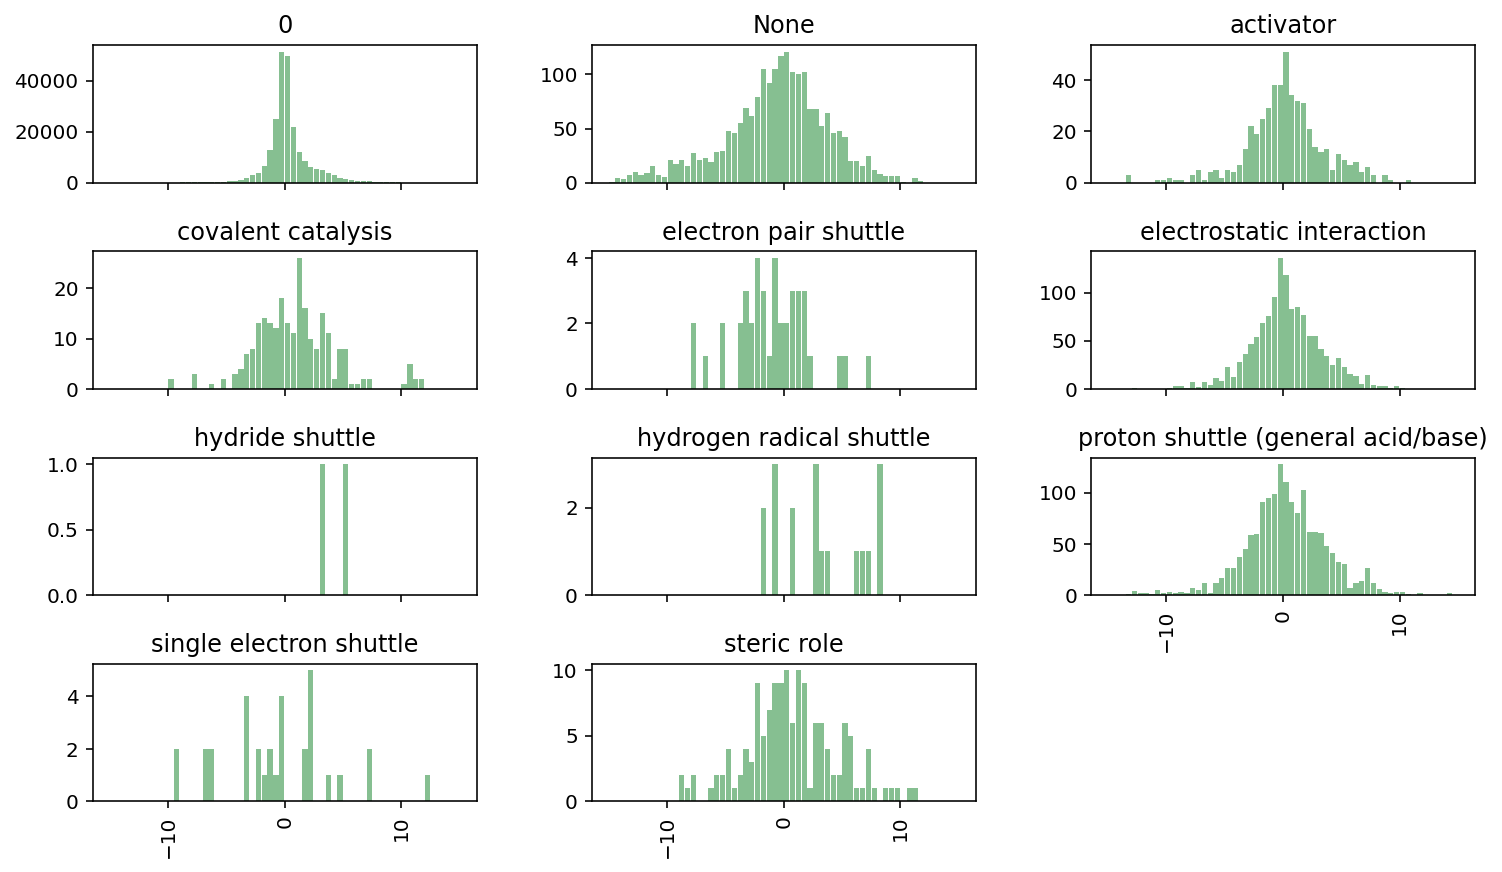

In [5]:
ax = plot_df.hist(column='delta-pKa', by='PARENT ROLE', bins=60, grid=False, 
#              figsize=(8,10), layout=(3,1),
             sharex=True, color='#86bf91', zorder=2, rwidth=0.9, range = (-15,15))

print('Delta pKa of All 921 Enzymes')


# for i,x in enumerate(ax):

#     # Despine
#     x.spines['right'].set_visible(False)
#     x.spines['top'].set_visible(False)
#     x.spines['left'].set_visible(False)

#     # Switch off ticks
#     x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#     # Draw horizontal axis lines
#     vals = x.get_yticks()
#     for tick in vals:
#         x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

#     # Set x-axis label
#     x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

#     # Set y-axis label
#     if i == 1:
#         x.set_ylabel("Sessions", labelpad=50, weight='bold', size=12)

#     # Format y-axis label
#     x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

#     x.tick_params(axis='x', rotation=0)

Delta pKa of ASP residue 404 Enzymes without cofactors


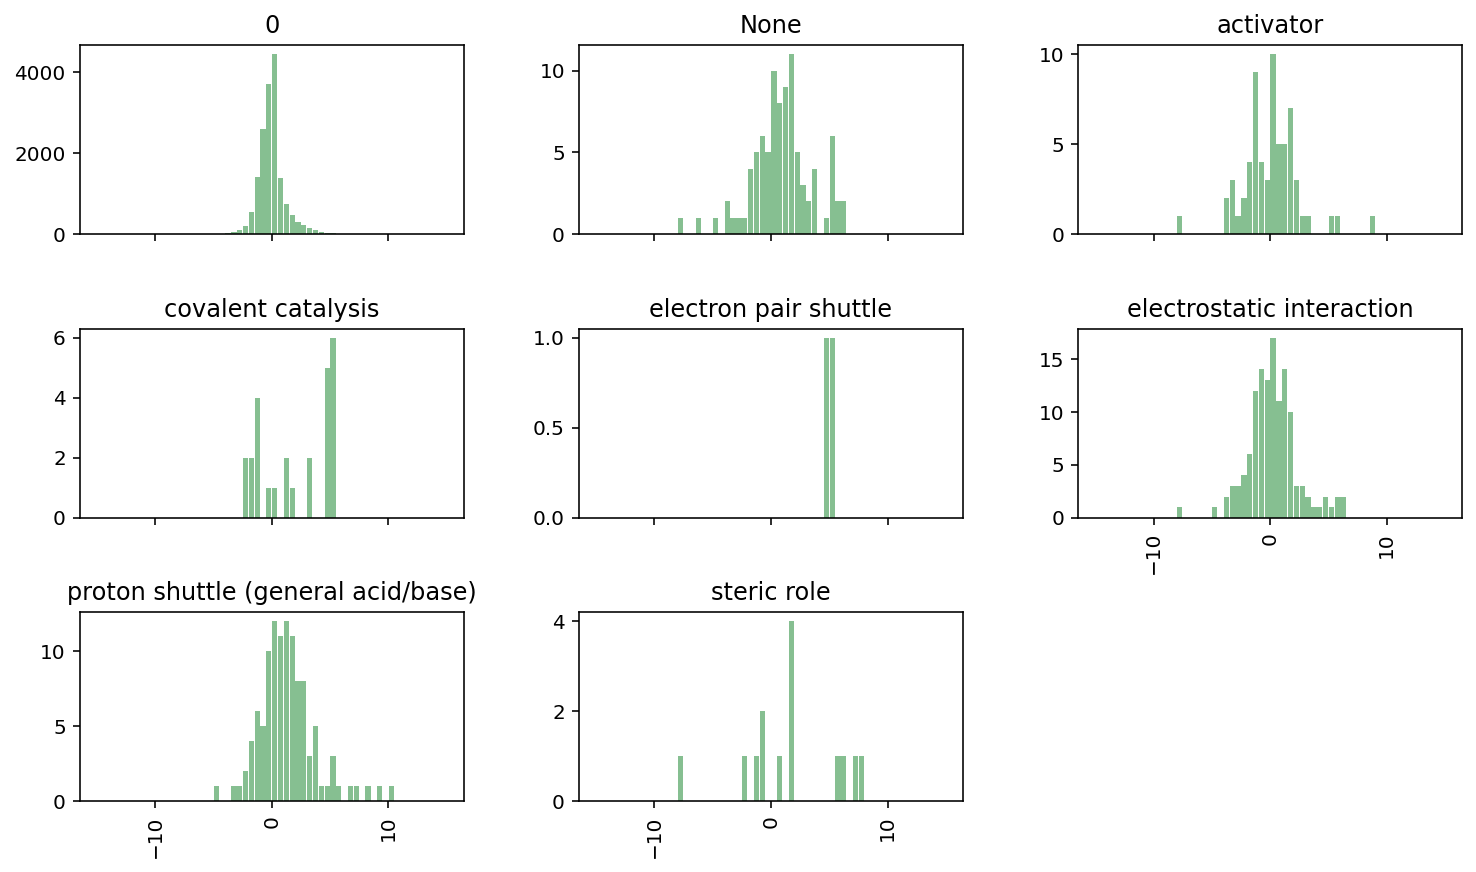

In [4]:
ax = plot_df.hist(column='delta-pKa', by='PARENT ROLE', bins=60, grid=False, 
#              figsize=(8,10), layout=(3,1),
             sharex=True, color='#86bf91', zorder=2, rwidth=0.9, range = (-15,15))

print('Delta pKa of ' + residue + ' residue in 404 Enzymes without cofactors')


In [0]:
ax = df.hist(column='delta-pKa', by='PARENT ROLE', bins=60, grid=False, 
#              figsize=(8,10), layout=(3,1),
             sharex=True, color='#86bf91', zorder=2, rwidth=0.9, range = (-15,15))

print('Delta pKa of 404 Enzymes without cofactors (curated dataset)')


<span style="Times New Roman; font-size:2em;">**Plotting Graph (Method 2)**</span>

In [0]:
ax = merged_df.plot(kind='hist', title='Delta pKa of All 921 Enzymes', column='delta-pKa', by='PARENT ROLE', bins=60, grid=False, 
             figsize=(30,60),
#                     layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9,
                    range = (-15,15))

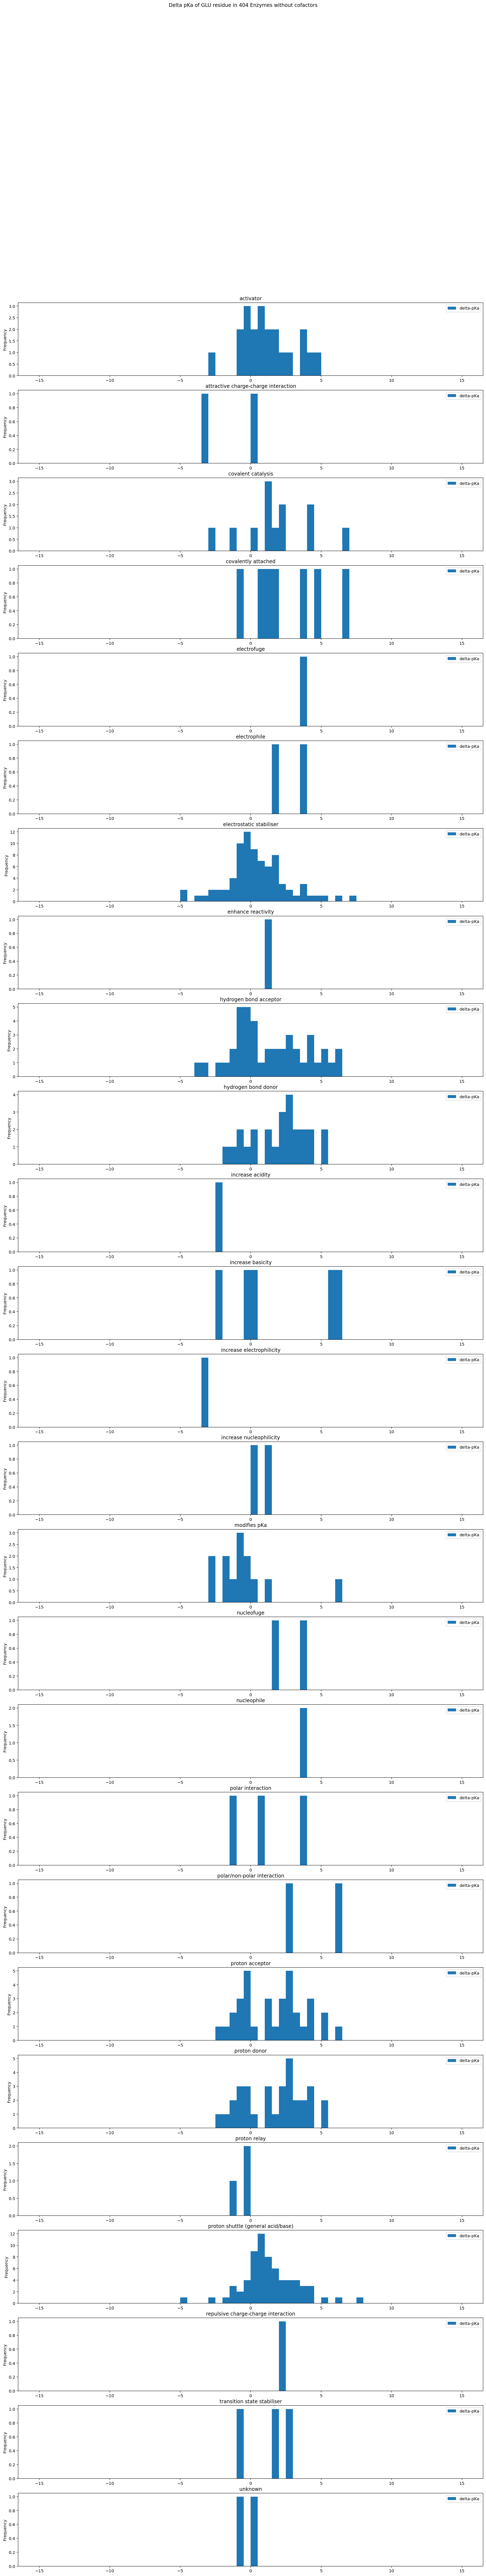

In [5]:
ax = plot_df.plot(kind='hist', title='Delta pKa of ' + residue + ' residue in 404 Enzymes without cofactors', column='delta-pKa', by='ROLE', bins=60, grid=False, 
             figsize=(20,100),
#                     layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9,
                    range = (-15,15))

In [1]:
fig = ax[0].get_figure()
fig.savefig('Delta pKa of ' + residue + ' residue in 404 Enzymes.png')

NameError: name 'ax' is not defined